Simulated annealing is blended with the second part of the problem and its implentation can be found at the end of the note book

In [35]:
import numpy as np
import time
import matplotlib.pyplot as plt
import random
from math import atan

1. Input data

In [36]:
with open('tsp40.txt') as f:
    lines = f.readlines()
num = int(lines[0])
pt_lst = []
for i in range(num):
    values = lines[i+1].split()
    vec = np.array([float(values[0]),float(values[1])])
    pt_lst.append(vec)

Algorithm:

randomize order of cities (known) -- with every city having a unique index      
assign every city a unique value of angle and sort by angles        
search for city with minimum distance from origin(centre) -- find its index in the angle list       
while number of cities >1 do:       
                find nearest adjacent city based on the difference in the angles        
connect the last city with the first one   
    

Finding the centre

In [37]:
city_lst = pt_lst
centre = np.zeros(2)

for city in city_lst:
    centre[0]+=city[0]
    centre[1]+=city[1]


centre[0] = centre[0]/len(city_lst)
centre[1] = centre[1]/len(city_lst)

Now we shift the origin to the centre and make another array with every city having its own unique index        
Then we find the angles relative to x axis in an anticlock wise sense

In [38]:
p = np.pi
t = 0#time duration of various segments of code
#city consists of cities as vectors

index_city = []
for i in range(len(city_lst)):
    index_city.append((i, city_lst[i] - centre))
## this is to give a unique id to the cities 
    
def angle(vec):
    val = 0
    if(vec[0]>0):
        if(vec[1]>0):val= atan(vec[1]/vec[0])
        else: val= 2*p + atan(vec[1]/vec[0])

    elif(vec[0] < 0):
        val= p + atan(vec[1]/vec[0])
    else:
        if(vec[1] >0):val= p/2
        else: val= 3*p/2
    
    return val

## assuming 0,0 does not come into picture 


angle_lst = [(index,city,angle(city)) for index,city in index_city]     #contains id with angle and city

In order to sort the cities in the order of angles( 0 to 2 pi ) we define compare function  

In [39]:
import functools
def compare(tup1, tup2):
    return tup1[2]-tup2[2]
angle_lst = sorted(angle_lst,key=functools.cmp_to_key(compare))

In [40]:
##distance of shifted city from the centre
def dist(city1):
    return (np.sum(city1)**2)**0.5

Now we search for the city with the minimum distance 

In [41]:
order = [] # order of the cyclic traversal found by the above method 
min_index =  0 # id of city with min distance
min_dist = dist(angle_lst[0][1])

##search for city with min dist from centre 
for i in range(1,len(angle_lst)):
    if dist(angle_lst[i][1]) < min_dist :
        min_index = i
        min_dist = dist(angle_lst[i][1])
#start with this index now got to corres index in the angle array
order.append(min_index)

In [42]:
start = 0 
#index of angle array sorted by angles (not id of the cities)
for i in range(len(city_lst)):
    if(angle_lst[i][0] == min_index):
        start = i
        break

Angle compare function compares two postive angles for choosing two cities adjacent to a given city in terms of angle

In [43]:
def angle_compare(angle1, angle2):
## returns true if first is grtr than the second 
    if angle1>p:
        if angle2>p:
            return angle1 - p > angle2 - p
        else:
            return angle1-p>angle2
    else:
        if angle2>p:
            return angle1 > angle2 - p
        else:
            return angle1>angle2


In [44]:
min_city = angle_lst[start][1]
traversal_dist = 0 

In [45]:
def dist2(city1,city2):
    #gives distance between two cities
    return (np.sum((city1-city2)**2))**0.5

we keep track of the current city by the start pointer and this pointer moves to the right or left based on which is closer (angular)       
once found, pointer is updated and the previous city is popped from the list

In [46]:
angle_lst2 = angle_lst.copy()
#keep looking till there's just one city
while(len(angle_lst2)!=1):
    prev = (start-1+len(angle_lst2))%len(angle_lst2)
    next = (start+1)%len(angle_lst2)
    
    prev_angle_diff = abs(angle_lst2[prev][2] - angle_lst2[start][2])
    next_angle_diff = abs(angle_lst2[next][2] - angle_lst2[start][2])
    # magnitude is important 
    
    if(angle_compare(prev_angle_diff,next_angle_diff)):
        
        order.append(angle_lst2[next][0])
        # store the ids of cities connected with each other
        if(start>next):
            angle_lst2.pop(start)
            start = next
        else:
            angle_lst2.pop(start)
        
    else:
                
        order.append(angle_lst2[prev][0])
        if(start>prev):
            angle_lst2.pop(start)
            start = prev    
        else:
            angle_lst2.pop(start)
            start = prev

order.append(angle_lst2[0][0])

In [47]:
order_ref = order.copy()
order = order_ref

In [48]:
# to plot the ordering
def plot_ordering(cities,filename):
    x_list,y_list = [],[]
    val_lst = []
    for city in cities:
        x_list.append(city[0])
        y_list.append(city[1])
        val_lst.append((city[0], city[1]))

    #for completing cycle 
    x_list.append(x_list[0])
    y_list.append(y_list[0])

    fig,ax = plt.subplots()
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    plt.plot(x_list,y_list)
    def draw_step(i,val_list):
        ax.scatter(val_list[i][0], val_list[i][1],s = 10,c='red')

    ani = FuncAnimation(fig, draw_step, frames=len(val_lst), fargs=(val_lst,))
    ani.save(filename, dpi=300,writer=PillowWriter(fps=2))
    

In [49]:
#to animate the ordering
from matplotlib.animation import FuncAnimation,PillowWriter
%matplotlib inline
def plot_and_animate(cities,filename):
    x_list,y_list = [],[]
    val_lst = []
    for city in cities:
        x_list.append(city[0])
        y_list.append(city[1])
        val_lst.append((city[0], city[1]))

    #for completing cycle 
    x_list.append(x_list[0])
    y_list.append(y_list[0])

    fig,ax = plt.subplots()
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    plt.plot(x_list,y_list)
    
    def draw_step(i,val_list):
        ax.scatter(val_list[i][0], val_list[i][1],s = 10,c='red')

    ani = FuncAnimation(fig, draw_step, frames=len(val_lst), fargs=(val_lst,))
    ani.save(filename, dpi=300,writer=PillowWriter(fps=2))

In [50]:
#to compute distance b/w two points 
def distance(vec1 , vec2): #O(1)
    return (sum((vec1-vec2)**2))**0.5
#list of vectors 
def travelDistance(path_lst): #O(n)
    dist = 0
    for i in range(len(path_lst) -1): dist+= distance(path_lst[i+1], path_lst[i])
    dist+= distance(path_lst[len(path_lst) -1],path_lst[0])
    return dist

Note that the dynamic part of the code begins here

In [51]:
city_by_order = [index_city[order[i]][1] for i in range(len(order))] 
#list order contains the ids of the city but for simulated annealing we require the city vectors
# so we extract the cities using their ids from the list- order

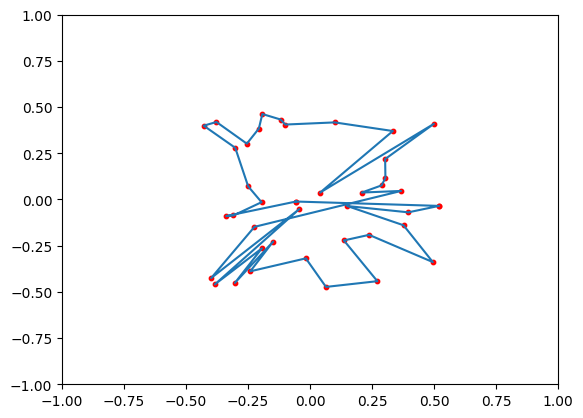

In [52]:
plot_ordering(city_by_order,'ani1.gif')

In [58]:
print(travelDistance(city_by_order))

7.629332478518823


In [59]:
def prev(idx):
    return (idx-1+len(order))%len(order)
def next(idx):
    return (idx+1)%len(order)

We now apply series of improvements     
1. Improvement 1: take a pair of cities and exchange their other neighbours if the distance decreases.       
2. Improvement 2: Take a trio of cities and shift the middle city between an adjacent pair and connect the remaining two cities if the distance decreases( try this both left and right )       
x.y represents xth improvement done yth time

1.1

In [60]:
idx = 0
#idx is the index in the list of ids of city corresponding to above list-order

while(idx<len(order)):
    
    curr_city = index_city[order[idx]][1]
    prev_city = index_city[order[prev(idx)]][1]
    next_city = index_city[order[next(idx)]][1]
    next_next_city = index_city[order[next(next(idx))]][1]
    if dist2(curr_city,prev_city) + dist2(next_city,next_next_city) > dist2(prev_city,next_city)+dist2(curr_city,next_next_city):
        order[idx],order[next(idx)]= order[next(idx)],  order[idx]
    idx+=1


7.521187479681713


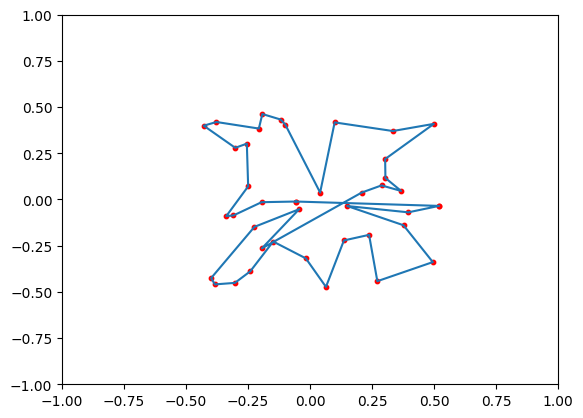

In [61]:
city_by_order = [index_city[order[i]][1] for i in range(len(order))] 
plot_ordering(city_by_order,'ani2.gif')
print(travelDistance(city_by_order))

2.1

In [62]:
idx = 0
#idx is the index in the list of ids of city corresponding to above list-order

while(idx<len(order)):
    
    curr_city = index_city[order[idx]][1]
    prev_city = index_city[order[prev(idx)]][1]
    prev_prev_city = index_city[order[prev(prev(idx))]][1]
    next_city = index_city[order[next(idx)]][1]
    next_next_city = index_city[order[next(next(idx))]][1]
    #calculate distances over a 5-city connection

    init = dist2(curr_city,prev_city) + dist2(curr_city,next_city) + dist2(prev_city,prev_prev_city) + dist2(next_city,next_next_city)
    final1 = dist2(curr_city,prev_prev_city) + dist2(curr_city,next_city) + dist2(prev_city,next_city) + dist2(prev_city, next_next_city)
    final2 = dist2(prev_city,next_city) + dist2(prev_prev_city, next_city) + dist2(curr_city,prev_city) + dist2(curr_city,next_next_city)
    if final1<init:
        prev_idx = prev(idx)
        next_idx = next(idx)
        order[prev_idx],order[idx] = order[idx],order[prev_idx]
        order[idx],order[next_idx] = order[next_idx],order[idx]
    elif final2<init:
        prev_idx = prev(idx)
        next_idx = next(idx)
        order[next_idx],order[idx] = order[idx],order[next_idx]
        order[idx],order[prev_idx] = order[prev_idx],order[idx]
    idx+=1


7.077990222659931


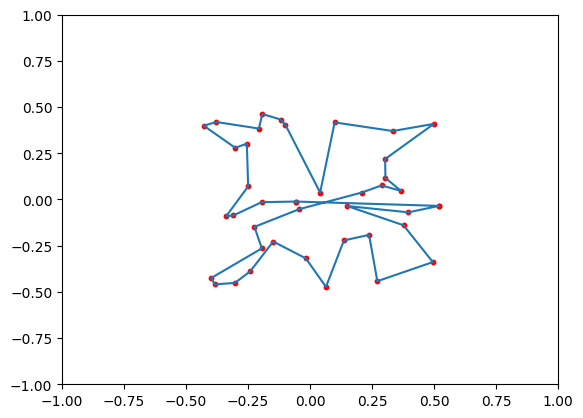

In [63]:
city_by_order = [index_city[order[i]][1] for i in range(len(order))] 
plot_ordering(city_by_order,'ani3.gif')
print(travelDistance(city_by_order))

1.2

In [64]:
idx = 0
#idx is the index in the list of ids of city corresponding to above list-order

while(idx<len(order)):
    
    curr_city = index_city[order[idx]][1]
    prev_city = index_city[order[prev(idx)]][1]
    next_city = index_city[order[next(idx)]][1]
    next_next_city = index_city[order[next(next(idx))]][1]
    if dist2(curr_city,prev_city) + dist2(next_city,next_next_city) > dist2(prev_city,next_city)+dist2(curr_city,next_next_city):
        order[idx],order[next(idx)]= order[next(idx)],  order[idx]
    idx+=1

7.077990222659931


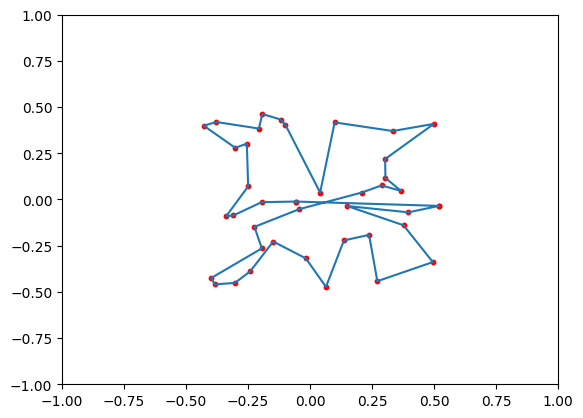

In [65]:
city_by_order = [index_city[order[i]][1] for i in range(len(order))] 
plot_ordering(city_by_order,'ani4.gif')
print(travelDistance(city_by_order))

2.2

In [66]:
idx = 0
#idx is the index in the list of ids of city corresponding to above list-order

while(idx<len(order)):
    
    curr_city = index_city[order[idx]][1]
    prev_city = index_city[order[prev(idx)]][1]
    prev_prev_city = index_city[order[prev(prev(idx))]][1]
    next_city = index_city[order[next(idx)]][1]
    next_next_city = index_city[order[next(next(idx))]][1]
    #calculate distances over a 5-city connection

    init = dist2(curr_city,prev_city) + dist2(curr_city,next_city) + dist2(prev_city,prev_prev_city) + dist2(next_city,next_next_city)
    final1 = dist2(curr_city,prev_prev_city) + dist2(curr_city,next_city) + dist2(prev_city,next_city) + dist2(prev_city, next_next_city)
    final2 = dist2(prev_city,next_city) + dist2(prev_prev_city, next_city) + dist2(curr_city,prev_city) + dist2(curr_city,next_next_city)
    if final1<init:
        prev_idx = prev(idx)
        next_idx = next(idx)
        order[prev_idx],order[idx] = order[idx],order[prev_idx]
        order[idx],order[next_idx] = order[next_idx],order[idx]
    elif final2<init:
        prev_idx = prev(idx)
        next_idx = next(idx)
        order[next_idx],order[idx] = order[idx],order[next_idx]
        order[idx],order[prev_idx] = order[prev_idx],order[idx]
    idx+=1


7.077990222659931


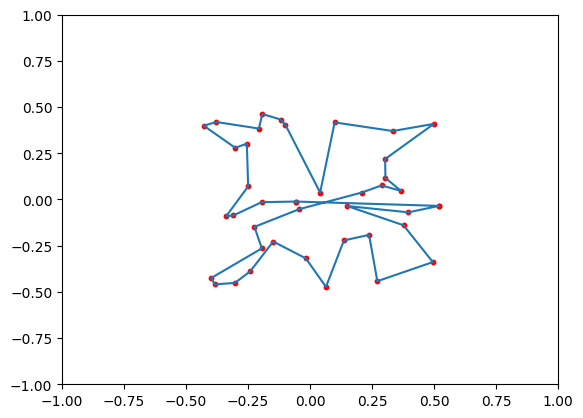

In [67]:
city_by_order = [index_city[order[i]][1] for i in range(len(order))] 
plot_ordering(city_by_order,'ani5.gif')
print(travelDistance(city_by_order))

In [30]:
pt_lst_variable = city_by_order.copy()
print(travelDistance(pt_lst_variable))

9.253206931042701


Simulated annealing

In [43]:
def probability(de, s,T):
    return np.exp(-s*de/T)

In [44]:
x_list = [] #for plotting purposes
y_list = []
path_len0 = travelDistance(city_by_order) #initial path length
print(travelDistance(city_by_order))

min = path_len0 #initialise min with the intial
min_iter = 0
iters = 0
num = len(city_by_order)

#initial parameters
T = 10000
s = 100
gamma =  0.999

while(T>1):
    #keep generating random numbers till two defferent number are found

    num1, num2 = random.randrange(num),random.randrange(num)
    while(num2==num1):
        num2 = random.randrange(num)
    
    #swap the two cities
    pt_lst_variable[num1], pt_lst_variable[num2] = pt_lst_variable[num2], pt_lst_variable[num1]
    order[num1],order[num2] = order[num2],order[num1]#change in order of ids for a bright future
    
    path_len1 = travelDistance(pt_lst_variable)

    if(path_len1<=path_len0):   # if new path len is better update it, and retain the change in order of cities
        path_len0 = path_len1
    else:
        n = random.random()
        prob = probability(path_len1-path_len0, s,T)
        if(n <= prob):
            # with this probability accept this swap 
            path_len0 = path_len1
        else:
            # with this prob reject the swap and reswap to get the original order
            pt_lst_variable[num1], pt_lst_variable[num2] = pt_lst_variable[num2], pt_lst_variable[num1]
            order[num1],order[num2] = order[num2],order[num1]
    
    T = T*gamma
    iters+=1
    
    x_list.append(path_len0)
    y_list.append(iters)
    
    #if the pathlen decreases update the min and correspoding iteration -- for plotting puropses
    if(min>path_len0):
        min = path_len0
        min_iter = iters
print(min)

7.077990222659931
6.64346015997638


after simulated annealing path looks like this

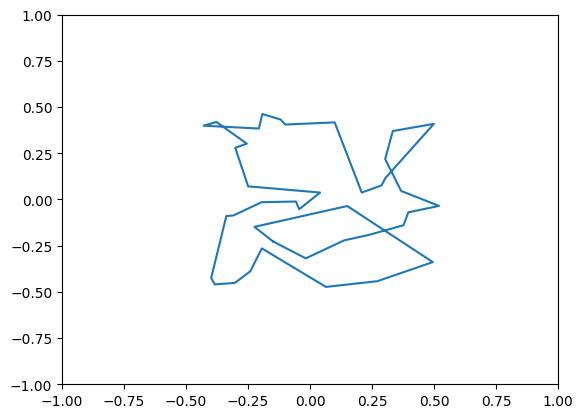

In [45]:
pt_lst_variable = [index_city[order[i]][1] for i in range(len(order))] 
plot_ordering(pt_lst_variable)